In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO
import torch

In [7]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 & pip install -r requirements.txt  

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x')
model.cuda()

Using cache found in C:\Users\mayan/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-3 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

100%|██████████| 166M/166M [00:06<00:00, 25.7MB/s] 

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1

In [ ]:
!cd yolov5 && python train.py --img 640 --batch 32 --epochs 40 --data dataset.yaml --weights yolov5s.pt --device 0

In [12]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'last.pt', force_reload=True)
model.cuda()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mayan/.cache\torch\hub\master.zip
YOLOv5  2024-3-4 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

image 1/1: 540x960 2 Plates, 1 Helmet, 4 Heads, 2 bike-riderss
Speed: 29.9ms pre-process, 20.8ms inference, 36.8ms NMS per image at shape (1, 3, 384, 640)


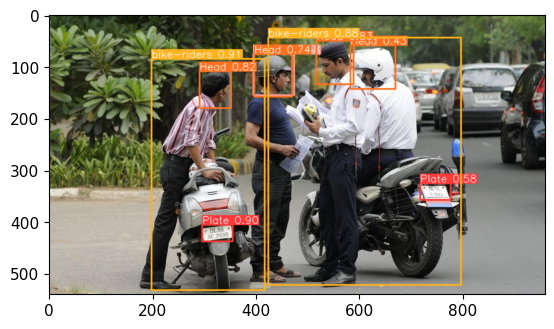

In [17]:
img = './thar2.jpg'
res = model(img)
res.print()

%matplotlib inline
plt.imshow(np.squeeze(res.render()))
plt.show()

In [1]:
import cv2
import numpy as np
import torch
from torchvision import transforms
import easyocr
import csv
from datetime import datetime

# Install yolov5
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 && pip install -r requirements.txt

# Load YOLOv5 models
model = torch.hub.load('ultralytics/yolov5', 'custom', path='last.pt', force_reload=True).cuda()

csv_file_path = './data.csv'

# Video settings
wCam, hCam = 1280, 750
cap = cv2.VideoCapture('./test2.mp4')
cap.set(3, wCam)
cap.set(4, hCam)

# Class labels
class_labels = ['Plate','Helmet','Head','Rider']  # Update with your class labels

helmet = False
head = False
plate = False

reader = easyocr.Reader(['en'])

plate_text = ''

while True:
    success, original_img = cap.read()
    if not success:
        break
    
    #original_img = cv2.flip(original_img, 1)  # Flip the image horizontally
    transform = transforms.ToTensor()
    rider = model(original_img)

    for i, obj in enumerate(rider.xyxy[0]):
        x1, y1, x2, y2, conf, cls = obj.tolist()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        confidence = round(conf * 100, 2)  # Convert confidence to percentage
        class_name = class_labels[int(cls)]  # Get the class name
        label = f'{class_name}: {confidence}%'
        cv2.rectangle(original_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(original_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        if class_name == 'Helmet':
            if x1 > rider.xyxy[0][0][0] and y1 > rider.xyxy[0][0][1] and x2 < rider.xyxy[0][0][2] and y2 < rider.xyxy[0][0][3]:
                helmet = True

        elif class_name == 'Head':
            if x1 > rider.xyxy[0][0][0] and y1 > rider.xyxy[0][0][1] and x2 < rider.xyxy[0][0][2] and y2 < rider.xyxy[0][0][3]:
                head = True

        elif class_name == 'Plate':
            if x1 > rider.xyxy[0][0][0] and y1 > rider.xyxy[0][0][1] and x2 < rider.xyxy[0][0][2] and y2 < rider.xyxy[0][0][3]:
                plate = True
            plate_img = original_img[y1:y2, x1:x2]
            text = reader.readtext(plate_img)
            for detection in text:
                print("License Num:", detection[1].upper())
                plate_text = detection[1].upper()
            
    if plate == True and helmet == True:
        new_rows = [[datetime.now(), plate_text, 'HELMET']]
        with open(csv_file_path, mode='a', newline='') as file:
            writer = csv.writer(file)
            for row in new_rows:
                writer.writerow(row)
        plate == False
        helmet == False

    elif plate ==True and head == True:
        new_rows = [[datetime.now(), plate_text, 'WITHOUT HELMET']]
        with open(csv_file_path, mode='a', newline='') as file:
            writer = csv.writer(file)
            for row in new_rows:
                writer.writerow(row)
        plate == False
        head == False

    cv2.imshow("Camera", original_img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


fatal: destination path 'yolov5' already exists and is not an empty directory.


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mayan/.cache\torch\hub\master.zip
YOLOv5  2024-3-12 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


License Num: THOTF'
License Num: JHOTE
License Num: 20196
License Num: JHOIF
License Num: JHOF
License Num: E2496
License Num: IF
License Num: JHO "
License Num: E2496
License Num: TF
License Num: JHO '
License Num: E2496
License Num: JHOIF
License Num: E2496
License Num: JHO IF
License Num: E2496
License Num: TF
License Num: JHO 
License Num: E2496
License Num: JJHOIF
License Num: E2496
License Num: JAOF
License Num: E2496
License Num: JHOTF
License Num: E296
License Num: JJHOIF
License Num: E2496
License Num: JHO F
License Num: E2496
License Num: JHOIF
License Num: E2496
License Num: JJHOTF"
License Num: E2496
License Num: JJHO@F
License Num: E2496
License Num: JHO IF
License Num: E2496
License Num: JHOIF
License Num: E2496
License Num: JHOTF
License Num: E2496
License Num: JHOIF
License Num: E2496
License Num: JHO1F
License Num: E2496
License Num: JJHO F"
License Num: E2496
License Num: JJHONE
License Num: E2496
License Num: JHOF"
License Num: E2496
License Num: JJHO €
License Num: 